In [158]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
from train_utils import compute_metrics
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [173]:
dfs = []
upstreams = ['wav2vec2', '_hubert', 'distilhubert', 'xlsr_53', 'unispeech', 'xls_r', 'wavlm' ]

paths = list(Path('../../result/').rglob('metrics_table_test.pickle'))+ \
list(Path('../../result_tullamore/').rglob('metrics_table_test.pickle'))+ \
list(Path('../../result_ene_24_timit2A/').rglob('metrics_table_test.pickle'))+\
list(Path('../../result_ene_20_useme/').rglob('metrics_table_test.pickle'))

for p in paths:
    name = p.parts[-2]
    path = p.parts[-4]
    df = pd.read_pickle(p)
    if not 'timit_' in name and not 'testigo' in name and not 'v2' in name:
        if isinstance(df.iloc[0]['F1Score'],np.ndarray):
            print(name)
        df['name']=name
        df['path']=path
        df['db'] = 'l2arctic' if 'l2arctic' in name else 'epadb'
        df['phone_rec'] = True if 'timit2A' in name else False
        df['ft'] = True if '_ft' in name else False
        for up in upstreams:
            if up in name:
                df['upstream'] = up
                
        if 'linear' in name:
            df['upstream']+='+linear'
        df = df.set_index(['phone_rec', 'upstream','ft','db'],append=True)
        df = df.swaplevel(0,-1)
        dfs.append(df)
df = pd.concat(dfs)
df = df[df.index.get_level_values(4)!=0]

In [174]:
df

1-AUC       EER  \
db       phone_rec upstream       ft    phone_automatic                       
l2arctic False     _hubert+linear False all              0.149433  0.230297   
                                        1                0.257739  0.313433   
                                        2                0.248773  0.282398   
                                        3                0.276839  0.330508   
                                        4                 0.19637  0.248201   
...                                                           ...       ...   
epadb    False     _hubert        False 35               0.209491      0.25   
                                        36                    0.0       0.0   
                                        37               0.177966      0.25   
                                        38               0.097661  0.157895   
                                        39                  0.325       0.5   

                                                          MinCost MinCostThr  \
db       phone_rec upstream       ft    phone_automatic                        
l2arctic False     _hubert+linear False all              0.631352   1.291865   
                                        1                0.806799   1.237695   
                                        2                0.769578   1.185282   
                                        3                0.843167   1.667676   
                                        4                0.595814   0.950432   
...                                                           ...        ...   
epadb    False     _hubert        False 35               0.685185   0.320723   
                                        36                    0.0   2.466642   
                                        37               0.588983    3.11037   
                                        38               0.377193  -1.250305   
                                        39                    0.8  -1.760243   

                                                        FPR4MinCost  \
db       phone_rec upstream       ft    phone_automatic               
l2arctic False     _hubert+linear False all                0.391222   
                                        1                  0.388889   
                                        2                  0.487179   
                                        3                  0.440299   
                                        4                  0.545455   
...                                                             ...   
epadb    False     _hubert        False 35                 0.185185   
                                        36                      0.0   
                                        37                     0.25   
                                        38                 0.166667   
                                        39                      0.8   

                                                        FNR4MinCost   ActCost  \
db       phone_rec upstream       ft    phone_automatic                         
l2arctic False     _hubert+linear False all                0.120065  0.631352   
                                        1                  0.208955  0.806799   
                                        2                  0.141199  0.769578   
                                        3                  0.201434  0.843167   
                                        4                   0.02518  0.595814   
...                                                             ...       ...   
epadb    False     _hubert        False 35                     0.25  0.685185   
                                        36                      0.0       0.0   
                                        37                 0.169492  0.588983   
                                        38                 0.105263  0.377193   
                                        39                      0.0       0.8   

             

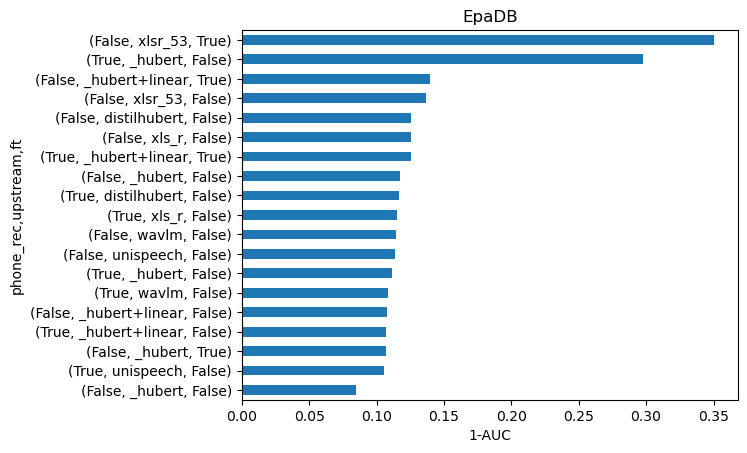

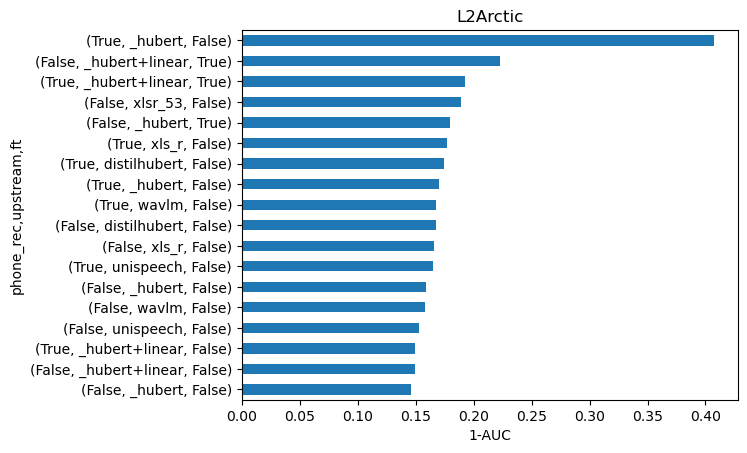

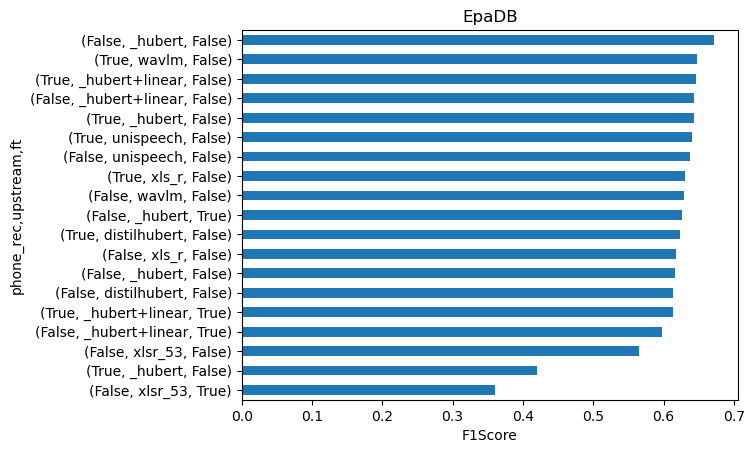

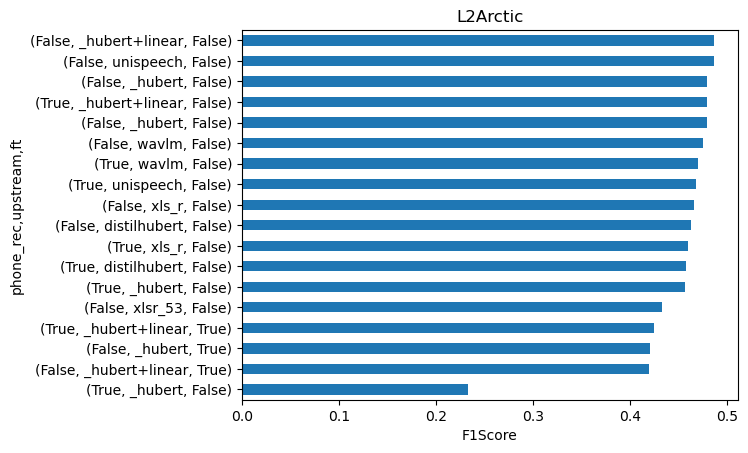

In [175]:
plt.figure()
df.xs('epadb',level=0).xs('all', level=3)['1-AUC'].sort_values().plot.barh();
plt.xlabel('1-AUC')
plt.title('EpaDB');
plt.figure()
df.xs('l2arctic',level=0).xs('all', level=3)['1-AUC'].sort_values().plot.barh();
plt.xlabel('1-AUC')
plt.title('L2Arctic');

plt.figure()
df.xs('epadb',level=0).xs('all', level=3)['F1Score'].sort_values().plot.barh();
plt.xlabel('F1Score')
plt.title('EpaDB');
plt.figure()
df.xs('l2arctic',level=0).xs('all', level=3)['F1Score'].sort_values().plot.barh();
plt.title('L2Arctic');
plt.xlabel('F1Score');

In [176]:
# dfs = []
# upstreams = ['wav2vec2', 'hubert', 'xlsr_53']
# for p in Path('../../result_ene_20_useme/').rglob('metrics_table_test.pickle'):
#     name = p.parts[-2]
#     df = pd.read_pickle(p)
#     df['name']=name
#     df['db'] = 'l2arctic' if 'l2arctic' in name else 'epadb'
#     df['nonnative_train'] = False if 'timit' in name else True
#     df['ft'] = True if '_ft' in name else False
#     for up in upstreams:
#         if up in name:
#             df['upstream'] = up    
#     df = df.set_index(['nonnative_train', 'upstream','ft','db'],append=True)
#     df = df.swaplevel(0,-1)
#     dfs.append(df)
# df = pd.concat(dfs)
# df = df[df.index.get_level_values(4)!=0]

In [104]:
# df[df.index.get_level_values(4)!='all'].groupby('name')['F1Score'].mean().sort_values().plot.barh();
# plt.xlim(0.8,0.93);

In [56]:
# df[df.index.get_level_values(4)!='all'].groupby('name')['1-AUC'].mean().sort_values().plot.barh();

In [94]:
def kdeplots(paths, texts):
    f, axs = plt.subplots(int(np.round(len(texts)/2)),2,figsize=(8, len(texts)*2))
    axs = axs.ravel()
    for i,(txt, path) in enumerate(zip(texts, paths)):
        ax = axs[i]
        dfx = pd.read_pickle(path+'/data_for_eval_dev.pickle')
        dfx = dfx[dfx['phone_automatic']!=0]     
        
        d = compute_metrics(dfx)
        ix = np.nanargmax(d['F1Score'])
        dev_best_f1_thr = d['F1Thr'][ix]
        dfx = pd.read_pickle(path+'/data_for_eval_test.pickle')
        dfx = dfx[dfx['phone_automatic']!=0]
        
        d = compute_metrics(dfx, f1_thr=dev_best_f1_thr)    
        sns.kdeplot(dfx,hue='label', x='gop_scores', ax = axs[i], common_norm=False);
        auc = roc_auc_score(dfx['label'], dfx['gop_scores'])
        ax.vlines(dev_best_f1_thr,0,ax.get_yticks()[-1], color='k')
        ax.set_title(f'{txt}\nAUC: {auc:0.2} F1Thr: {dev_best_f1_thr:0.2}\n R: {d["Recall"]:0.2} P: {d["Precision"]:0.2} F1: {d["F1Score"]:0.2} ')

    plt.tight_layout()

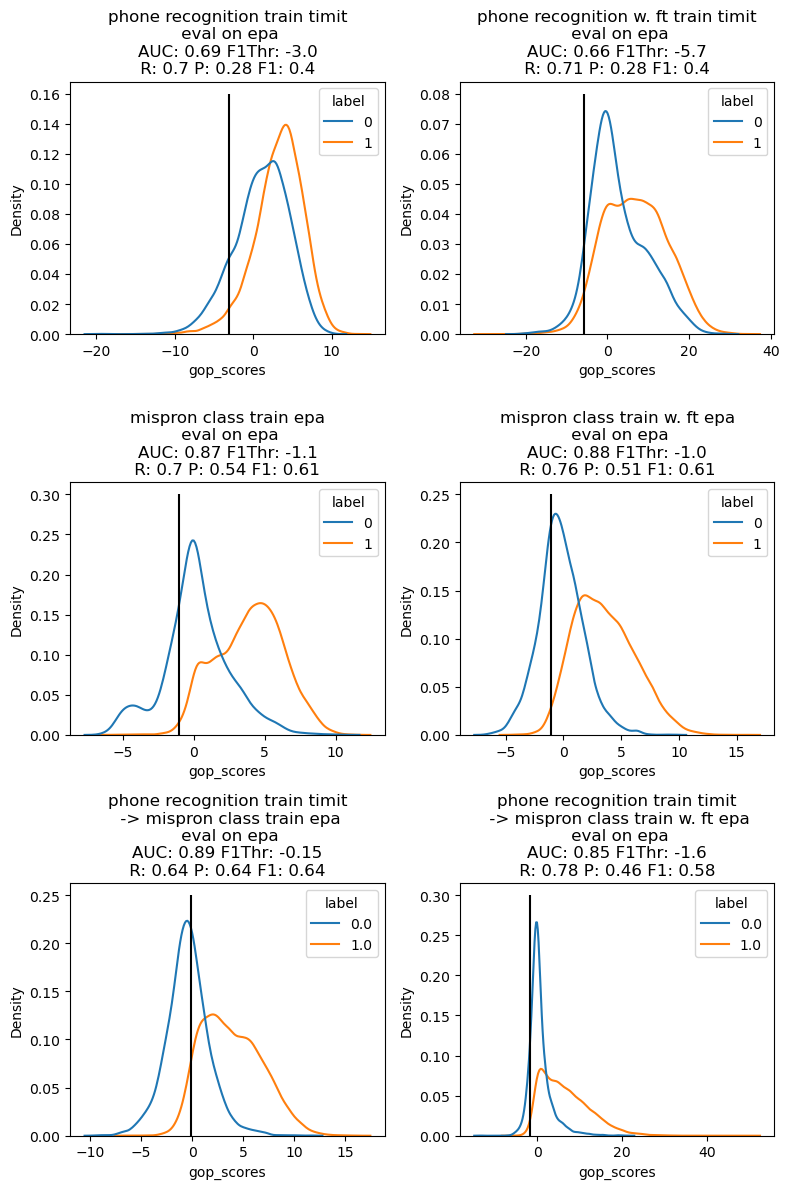

In [95]:
paths = ['../../result_ene_20_useme/downstream/timit_hubert_epa/', 
         '../../result_ene_20_useme/downstream/timit_hubert_ft_epa/',
         '../../result_ene_20_useme/downstream/epa_hubert_ft/', 
         '../../result_ene_20_useme/downstream/epa_hubert/', 
         '../../result_ene_24_timit2A/downstream/timit2A_hubert_epa/',
         '../../result/downstream/timit2A_hubert_epa_ft/'
        ]
texts = ['phone recognition train timit\n eval on epa',
         'phone recognition w. ft train timit\n eval on epa',
         'mispron class train epa\n eval on epa',
         'mispron class train w. ft epa\n eval on epa',
         'phone recognition train timit\n -> mispron class train epa\n eval on epa',
         'phone recognition train timit\n -> mispron class train w. ft epa\n eval on epa',
    ]
kdeplots(paths, texts)

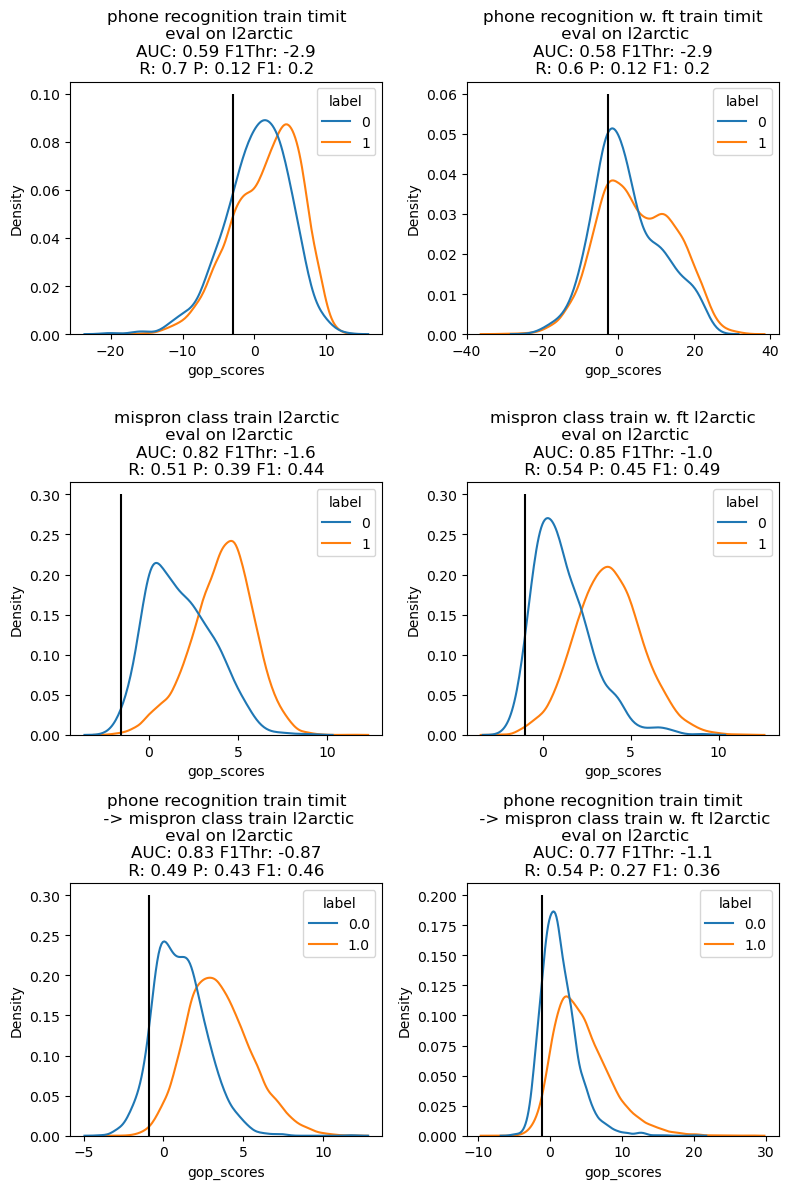

In [96]:
paths = ['../../result_ene_20_useme/downstream/timit_hubert_l2arctic/', 
         '../../result_ene_20_useme/downstream/timit_hubert_ft_l2arctic/',
         '../../result_ene_20_useme/downstream/l2arctic_hubert_ft/', 
         '../../result_ene_20_useme/downstream/l2arctic_hubert/', 
         '../../result_ene_24_timit2A/downstream/timit2A_hubert_l2arctic/',
         '../../result/downstream/timit2A_hubert_l2arctic_ft/']
        
texts = ['phone recognition train timit\n eval on l2arctic',
         'phone recognition w. ft train timit\n eval on l2arctic',
         'mispron class train l2arctic\n eval on l2arctic',
         'mispron class train w. ft l2arctic\n eval on l2arctic',
         'phone recognition train timit\n -> mispron class train l2arctic\n eval on l2arctic',
         'phone recognition train timit\n -> mispron class train w. ft l2arctic\n eval on l2arctic'
    ]
kdeplots(paths, texts)

In [3]:
# dfx = pd.read_pickle('../../result_ene_20_useme/downstream/l2arctic_wav2vec2_ft/data_for_eval_dev.pickle')
# dfy = pd.read_pickle('../../result_ene_20_useme/downstream/l2arctic_wav2vec2_ft/data_for_eval_test.pickle')

In [10]:
# precision, recall, f1_thr = precision_recall_curve(dfx['label'], dfx['gop_scores'], pos_label=1)
# numerator = 2 * recall * precision
# denom = recall + precision
# f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
# plt.plot(f1_thr, f1_scores[:-1])
# plt.plot(f1_thr, precision[:-1])
# plt.plot(f1_thr, recall[:-1])
# plt.ylim(0.8,1)

# precision, recall, f1_thr = precision_recall_curve(dfy['label'], dfy['gop_scores'], pos_label=1)
# numerator = 2 * recall * precision
# denom = recall + precision
# f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
# plt.plot(f1_thr, f1_scores[:-1])
# plt.plot(f1_thr, precision[:-1])
# plt.plot(f1_thr, recall[:-1])
# plt.ylim(0.8,1)

In [11]:
# dfx = pd.read_pickle('../../result_ene_20_useme/downstream/timit_hubert_ft_l2arctic/data_for_eval_test.pickle')
# dfy = pd.read_pickle('../../result_ene_20_useme/downstream/l2arctic_hubert_ft/data_for_eval_test.pickle')
# dfx = dfx[dfx['phone_automatic']!=0]
# dfy= dfy[dfy['phone_automatic']!=0]

# precision, recall, f1_thr = precision_recall_curve(dfx['label'], dfx['gop_scores'], pos_label=1)
# numerator = 2 * recall * precision
# denom = recall + precision
# f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
# plt.plot(f1_thr, f1_scores[:-1])
# plt.ylim(0.8,1)

# precision, recall, f1_thr = precision_recall_curve(dfy['label'], dfy['gop_scores'], pos_label=1)
# numerator = 2 * recall * precision
# denom = recall + precision
# f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
# plt.plot(f1_thr, f1_scores[:-1])
# plt.ylim(0.75,1);

In [12]:
# f1maxs1 = np.ones(40)
# f1maxs1[:]=np.nan

# for k, g1 in dfx.groupby('phone_automatic'):
#     if len(g1)>0:
#         precision, recall, f1_thr = precision_recall_curve(g1['label'], g1['gop_scores'], pos_label=1)
#         numerator = 2 * recall * precision
#         denom = recall + precision
#         f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
#         f1maxs1[k] = np.max(f1_scores) 
# plt.plot(f1maxs1,'o',  mfc='none');
      
# f1maxs2 = np.zeros(40)
# f1maxs2[:]=np.nan

# for k, g2 in dfy.groupby('phone_automatic'):
#     if len(g2)>0:
#         precision, recall, f1_thr = precision_recall_curve(g2['label'], g2['gop_scores'], pos_label=1)
#         numerator = 2 * recall * precision
#         denom = recall + precision
#         f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
#         f1maxs2[k] = np.max(f1_scores) 
# plt.plot(f1maxs2,'o', mfc='none');
# # plt.plot(f1maxs1-f1maxs2,'o', mfc='none');
# # np.nanmean(f1maxs1), np.nanmean(f1maxs2)

# plt.plot(df[(df.index.get_level_values(4)!='all') & (df['name']=='l2arctic_hubert_ft')]['F1Score'].index.get_level_values(4), df[(df.index.get_level_values(4)!='all') & (df['name']=='l2arctic_hubert_ft')]['F1Score'].values,'x', mfc='none');

In [13]:
# df[(df.index.get_level_values(4)!='all') & (df['name']=='l2arctic_hubert_ft')]['F1Score'].mean()

In [14]:
# df[df.index.get_level_values(4)!='all'].groupby('name')['F1Score'].mean().loc['l2arctic_hubert_ft']

In [15]:
# df[df.index.get_level_values(4)!='all'].groupby('name')['F1Score'].mean().loc['timit_hubert_ft_l2arctic']

In [16]:
# df[df['name']=='l2arctic_hubert_ft'].xs('all', level=4)['F1Score'].iloc[0]

In [17]:
# df[df['name']=='timit_hubert_ft_l2arctic'].xs('all', level=4)['F1Score'].iloc[0]

In [18]:
# dfx.boxplot(column='gop_scores',by='label');

In [19]:
# precision, recall, f1_thr = precision_recall_curve(dfx['label'], dfx['gop_scores'], pos_label=1)
# numerator = 2 * recall * precision
# denom = recall + precision
# f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom != 0))
# plt.plot(f1_thr, f1_scores[:-1])
# plt.plot(f1_thr, precision[:-1])
# plt.plot(f1_thr, recall[:-1])
# plt.ylim(0.8,1);

In [20]:
# df.xs('all', level=4)['F1Thr']